## Observations and Insights 

1. There was a fairly even split of male and female mice
2. There was only one outlier in final readings across the four studies: Capomulin, Ramicane, Infubinol, Ceftamin
3. There is a fairly strong correlation between the mouse weight and tumor size

# Start of Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Loading the Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_all = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_all["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = mouse_all[mouse_all.duplicated(['Mouse ID','Timepoint'])]
ID = duplicate_ID['Mouse ID'].values[0]
ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_ID = mouse_all[mouse_all.duplicated(['Mouse ID','Timepoint'])]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandf=mouse_all.drop(mouse_all[mouse_all['Mouse ID']==ID].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
cleandf['Mouse ID'].nunique()

248

In [7]:
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=cleandf.groupby(by=["Drug Regimen"]).mean()
mean=mean["Tumor Volume (mm3)"]
mean

median=cleandf.groupby(by=["Drug Regimen"]).median()
median=median["Tumor Volume (mm3)"]
median

variance=cleandf.groupby(by=["Drug Regimen"]).var()
variance=variance["Tumor Volume (mm3)"]
variance

stdev=cleandf.groupby(by=["Drug Regimen"]).std()
stdev=stdev["Tumor Volume (mm3)"]
stdev

stderrm=cleandf.groupby(by=["Drug Regimen"]).sem()
stderrm=stderrm["Tumor Volume (mm3)"]
stderrm

# merge the tables together to form a summary table
sum_table=pd.merge(mean, median, on='Drug Regimen')
sum_table=sum_table.rename(columns={"Tumor Volume (mm3)_x":"Mean","Tumor Volume (mm3)_y":"Median"})

sum_table=pd.merge(sum_table, variance, on='Drug Regimen')
sum_table=sum_table.rename(columns={"Tumor Volume (mm3)":"Variance"})

sum_table=pd.merge(sum_table, stdev, on='Drug Regimen')
sum_table=sum_table.rename(columns={"Tumor Volume (mm3)":"Std Deviation"})

sum_table=pd.merge(sum_table, stderrm, on='Drug Regimen')
sum_table=sum_table.rename(columns={"Tumor Volume (mm3)":"SEM"})

sum_table

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum2=cleandf.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

sum2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

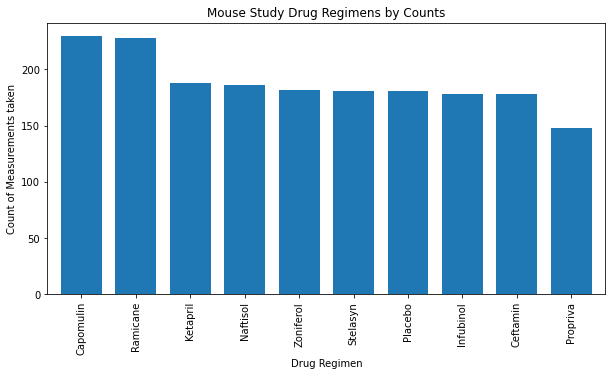

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Get the counts in to a dataframe
counts=cleandf["Drug Regimen"].value_counts()

# Plot and format from that dataframe

counts.plot(kind="bar", figsize=(10,5), width=.75)
plt.title("Mouse Study Drug Regimens by Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Measurements taken")

plt.show()

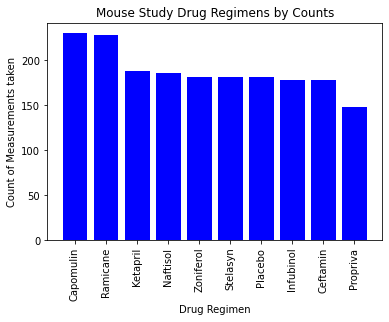

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get the dataframe and reset the index so the title can be used for labeling
df = pd.DataFrame(data=counts)
df.reset_index(inplace = True)

#setting the x axis, labeling it, and then plotting

x_axis=df.iloc[:,0]
plt.bar(x_axis, df.iloc[:,1], color='b', alpha=1, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation="vertical")

# labeling
plt.title("Mouse Study Drug Regimens by Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Measurements taken")
plt.show()

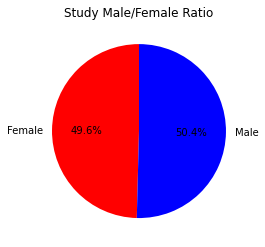

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
demo=cleandf.groupby(['Mouse ID','Sex']).min()

demo.reset_index(inplace = True)

demo=demo.groupby('Sex').count()
demo=demo['Mouse ID']

demodf=pd.DataFrame(demo)
colors =['red','blue']
demodf.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%', colors=colors,startangle=90, legend=False)

plt.title("Study Male/Female Ratio")
plt.ylabel('')
plt.show()

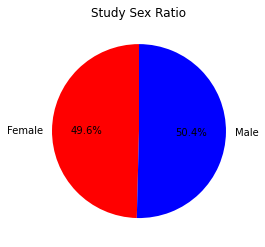

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

demo=cleandf.groupby(['Mouse ID','Sex']).min()

demo.reset_index(inplace = True)

demo=demo.groupby('Sex').count()
demo=demo['Mouse ID']

demodf=pd.DataFrame(demo)
demodf=demodf.reset_index()

sizes=demodf.iloc[:,1]
labels=demodf.iloc[:,0]
colors =['red','blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)

plt.title("Study Sex Ratio")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

df=cleandf.groupby(['Mouse ID']).max()
max_time=df['Timepoint']
max_time=pd.DataFrame(max_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_volume=pd.merge(max_time, cleandf, on=['Timepoint',"Mouse ID"], how='inner')
max_volume[max_volume['Drug Regimen'].isin(treatment_list)]  

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
3,45,a275,Ceftamin,Female,20,28,62.999356,3
6,45,a411,Ramicane,Male,3,22,38.407618,1
7,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,45,y769,Ceftamin,Female,6,27,68.594745,4
239,45,y793,Capomulin,Male,17,17,31.896238,2
240,45,y865,Ceftamin,Male,23,26,64.729837,3
244,45,z578,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

    # done above
    
# Get the volume for Capomulin, then put only the tumor volume into the dataset, repeat for each drug in the list

Capomulin=max_volume[max_volume['Drug Regimen']=='Capomulin']
Capomulin_list=Capomulin['Tumor Volume (mm3)']


Ramicane=max_volume[max_volume['Drug Regimen']=='Ramicane']
Ramicane_list=Ramicane['Tumor Volume (mm3)']

Infubinol=max_volume[max_volume['Drug Regimen']=='Infubinol']
Infubinol_list=Infubinol['Tumor Volume (mm3)']

Ceftamin=max_volume[max_volume['Drug Regimen']=='Ceftamin']
Ceftamin_list=Ceftamin['Tumor Volume (mm3)']

quartiles_cap = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
print(f'lower: {lowerq_cap}, upper: {upperq_cap}, range: {iqr_cap}')

#### IF I DON'T FIGURE OUT THE INSTRUCTIONS BELOW, COMPLETE THE CALCS ABOVE FOR EACH TREATEMENT

# Create empty list to fill with tumor vol data (for plotting)

# vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
        
    # Determine outliers using upper and lower bounds
    

lower: 32.37735684, upper: 40.1592203, range: 7.781863460000004


In [21]:
quartiles_cap[0.25]

32.37735684

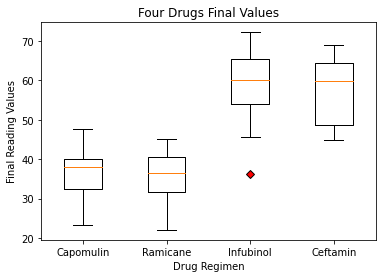

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [Capomulin_list, Ramicane_list, Infubinol_list, Ceftamin_list]
red_diamond = dict(markerfacecolor='r', marker='D')
fig, boxs = plt.subplots()
boxs.set_title('Four Drugs Final Values')

boxs.boxplot(data, flierprops=red_diamond)
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.xlabel("Drug Regimen")
plt.ylabel("Final Reading Values")
plt.show()

In [19]:
data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

## Line and Scatter Plots

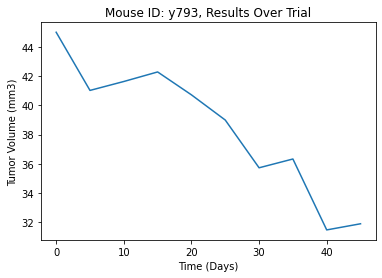

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Mouse_ID = input("Enter a Mouse ID ")
Mouse_ID='y793'

Choosen_mouse_data=cleandf[cleandf['Mouse ID']==Mouse_ID]

Choosen_mouse_data.plot('Timepoint', 'Tumor Volume (mm3)', legend=False)
plt.title(f"Mouse ID: {Mouse_ID}, Results Over Trial")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

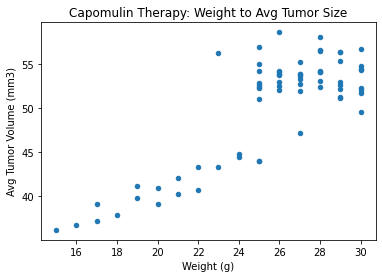

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capolumlin_data=cleandf[cleandf['Drug Regimen']=='Capomulin']

mean_wght=cleandf.groupby(['Weight (g)','Drug Regimen']).mean()
mean_wght.reset_index(inplace = True)
                              
mean_wght.plot.scatter('Weight (g)', 'Tumor Volume (mm3)', legend=False)
plt.title("Capomulin Therapy: Weight to Avg Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The r-squared is: 0.7009252699907923
The linear model equation is: y = 1.36x + 15.58


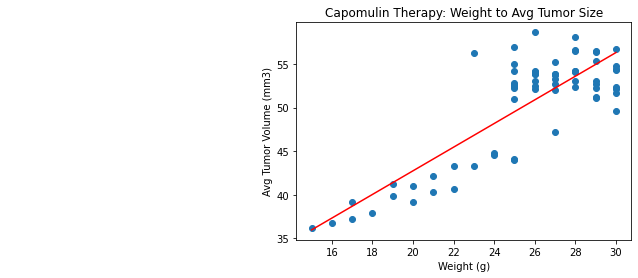

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mean_wght['Weight (g)']
y_values = mean_wght['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Capomulin Therapy: Weight to Avg Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
print(f'The linear model equation is: {line_eq}')
plt.show()